## Estimating the z-tuning range of a two-photon microscope equipped with an electrically tunable lens

### TODO

- [ ] add plots for the tuning range
- [ ] add light-sheet calculations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#plt.style.use('dark_background')

In [2]:
# 16x Multiarea N-beam config, 6 mm mirrors, ETL-range optimized excitation path
f_ETL_min = -100
f_ETL_max = 100
#f_OL = -150
f_RL1 = 140
f_RL2 = 100
f_SL = 89
f_TL = 200
f_OBJ = 12.5
n = 1.33

Formula for the offset:

$$ \Delta z = \frac{n}{f_{ETL}}\cdot\left(\frac{f_{RL1}}{f_{RL2}}\right)^2 \cdot \left(\frac{f_{SL}}{f_{TL}}\right)^2\cdot f_{OBJ}^2$$

$$ \Delta z = n \cdot \frac{f_{OL}+f_{ETL}}{f_{OL} \cdot f_{ETL}}\cdot\left(\frac{f_{RL1}}{f_{RL2}}\right)^2 \cdot \left(\frac{f_{SL}}{f_{TL}}\right)^2\cdot f_{OBJ}^2$$

In [3]:
def delta_z(n, f_ETL, f_RL1, f_RL2, f_SL, f_TL, f_OBJ):
    return np.divide(n, f_ETL)*np.power(np.divide(f_RL1,f_RL2),2)*np.power(np.divide(f_SL,f_TL),2)*np.power(f_OBJ,2)

def delta_z_OL(n, f_ETL, f_OL, f_RL1, f_RL2, f_SL, f_TL, f_OBJ):
    return n * np.divide(f_OL+f_ETL, f_OL*f_ETL)*np.power(np.divide(f_RL1,f_RL2),2)*np.power(np.divide(f_SL,f_TL),2)*np.power(f_OBJ,2)

In [4]:
x = np.linspace(100, -100, 1000)
ETL_focal_lengths = np.linspace(80, 230, 1000)

In [5]:
delta_z_array = delta_z_OL(1.33, ETL_focal_lengths, -150, 140, 100, 89, 200, 12.5)

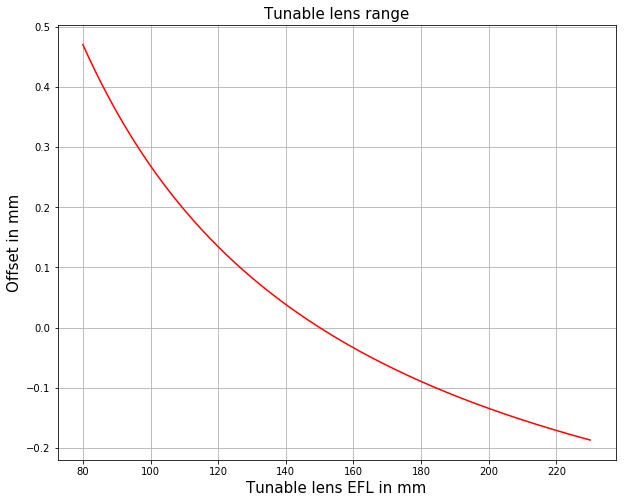

In [6]:
fig = plt.figure()

titlestring =  'Tunable lens range'

plt.title(titlestring,fontsize=15)
plt.grid(True)

fig.set_size_inches(10, 8)
ax = fig.add_subplot(111)
plt.plot(ETL_focal_lengths, delta_z_array,'r', label='Tunable lens')

#legend = ax.legend()
#ax.set_yscale('log')
ax.set_xlabel('Tunable lens EFL in mm')
ax.set_ylabel('Offset in mm')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

plt.show()

In [7]:
# 16x Multiarea N-beam config, 10 mm mirrors, ETL-range optimized excitation path
f_ETL_min = 80
f_ETL_max = 230
f_OL = -150
f_RL1 = 80
f_RL2 = 89
f_SL = 89
f_TL = 200
f_OBJ = 12.5
n = 1.33